In [113]:
import pyspark as ps 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
spark = (ps.sql.SparkSession.builder
       .master("local[4]")
       .appName("sparkSQL exercise")
       .getOrCreate()
       )

In [3]:
sc = spark.sparkContext

In [4]:
sc


<SparkContext master=local[4] appName=sparkSQL exercise>

In [66]:
df = spark.read.csv('../../../../Desktop/DSI/Data_Sets/245_1.csv',
                   header = True,
                   quote = '"',
                   sep = ',',
                   inferSchema = True)

In [26]:
df.head
df.show

<bound method DataFrame.show of DataFrame[id: string, brand: string, categories: string, dateAdded: timestamp, dateUpdated: timestamp, ean: string, keys: string, manufacturer: string, manufacturerNumber: string, name: string, reviews.date: string, reviews.dateAdded: timestamp, reviews.dateSeen: string, reviews.didPurchase: boolean, reviews.doRecommend: boolean, reviews.id: int, reviews.numHelpful: int, reviews.rating: int, reviews.sourceURLs: string, reviews.text: string, reviews.title: string, reviews.userCity: string, reviews.userProvince: string, reviews.username: string, upc: string]>

In [185]:
df.show

<bound method DataFrame.show of DataFrame[id: string, brand: string, categories: string, dateAdded: timestamp, dateUpdated: timestamp, ean: string, keys: string, manufacturer: string, manufacturerNumber: string, name: string, reviewsdate: string, reviewsdateAdded: timestamp, reviewsdateSeen: string, reviewsdidPurchase: boolean, reviewsdoRecommend: boolean, reviewsid: int, reviewsnumHelpful: int, reviewsrating: int, reviewssourceURLs: string, reviewstext: string, reviewstitle: string, reviewsuserCity: string, reviewsuserProvince: string, reviewsusername: string, upc: string]>

In [104]:
df.describe()


DataFrame[summary: string, id: string, brand: string, categories: string, ean: string, keys: string, manufacturer: string, manufacturerNumber: string, name: string, reviewsdate: string, reviewsdateSeen: string, reviewsid: string, reviewsnumHelpful: string, reviewsrating: string, reviewssourceURLs: string, reviewstext: string, reviewstitle: string, reviewsuserCity: string, reviewsuserProvince: string, reviewsusername: string, upc: string]

In [186]:
df.createOrReplaceTempView('df_reviews')

In [106]:
df_sql_brand = spark.sql("SELECT brand,reviewsdate,categories,reviewsdidPurchase,reviewsdoRecommend, reviewsrating,reviewstitle, reviewstext FROM df_reviews")
df_sql_brand.show(100)

+---------------+--------------------+--------------------+------------------+------------------+-------------+--------------------+--------------------+
|          brand|         reviewsdate|          categories|reviewsdidPurchase|reviewsdoRecommend|reviewsrating|        reviewstitle|         reviewstext|
+---------------+--------------------+--------------------+------------------+------------------+-------------+--------------------+--------------------+
|Universal Music|2012-11-30T06:21:...|Movies, Music & B...|              null|              null|            5|        Just Awesome|i love this album...|
|       Lundberg|2017-07-09T00:00:...|Food,Packaged Foo...|              true|              null|            5|                Good|Good flavor. This...|
|       Lundberg|2017-07-09T00:00:...|Food,Packaged Foo...|              true|              null|            5|                Good|        Good flavor.|
|            K-Y|2016-01-06T00:00:...|Personal Care,Med...|             fals

In [111]:
pandas_df = df_sql_brand.toPandas()

In [190]:
len(pandas_df)


71044

In [197]:
pandas_df

,brand,reviewsdate,categories,reviewsdidPurchase,reviewsdoRecommend,reviewsrating,reviewstitle,reviewstext
0,Universal Music,2012-11-30T06:21:45.000Z,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",None,None,5,Just Awesome,i love this album. it's very good. more to the...
1,Lundberg,2017-07-09T00:00:00.000Z,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",True,None,5,Good,Good flavor. This review was collected as part...
2,Lundberg,2017-07-09T00:00:00.000Z,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",True,None,5,Good,Good flavor.
3,K-Y,2016-01-06T00:00:00.000Z,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",False,False,1,Disappointed,I read through the reviews on here before look...
4,K-Y,2016-12-21T00:00:00.000Z,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",False,False,1,Irritation,My husband bought this gel for us. The gel cau...
...,...,...,...,...,...,...,...,...
71039,Opti-Free,2012-03-25T00:00:00.000Z,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",False,True,5,Solves the problem,I'm dealing with dry eyes and very sensitive t...
71040,Opti-Free,2015-12-07T00:00:00.000Z,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",False,True,5,Great stuff!,Great stuff! Helps keep my contacts moist all ...
71041,Opti-Free,2015-07-23T00:00:00.000Z,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",False,True,5,My review,Right price
71042,Bebe Au Lait,2016-01-19T18:28:16.000Z,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",None,True,5,Wonderful Product,I was so pleased when this scarf arrived for m...


In [199]:
null = pandas_df[pandas_df["reviewsdidPurchase"]== Null]

NameError: name 'Null' is not defined

In [193]:
nverifieddf= pandas_df[pandas_df["reviewsdidPurchase"]== False]

In [196]:
len(nverifieddf)

28476

In [158]:
 verifieddf = pandas_df[pandas_df["reviewsdidPurchase"] == True]

In [159]:
len(verifieddf)

3682

In [161]:
verifieddf['brand'].unique()

array(['Lundberg', 'K-Y', 'J.R. Watkins', 'AMBI', "Johnson's", 'Olay',
       'Windex', 'KIND', 'Aussie', 'Disney', 'CeraVe', 'Neutrogena',
       'Meguiars', 'Banana Boat', 'Cetaphil', 'Suave', 'Bumble Bee',
       'Citrus Magic', 'Biokleen', 'Yes to Carrots', 'Warner Bros.',
       'Target.com Use Only', 'FOX', 'Hawaiian Punch',
       'Universal Home Video', 'Holmes', 'Pantene', 'MaraNatha', 'Chex',
       'TRESemme', 'Wagan', 'Creme Of Nature', 'Arrid', 'Eagle Brand',
       'Canada Dry', 'Ragu', "Newman's Own Organics", 'Hoover',
       'Calvin Klein', 'Sony Pictures', "Annie's", 'Super PoliGrip',
       'Nearly Natural', 'Australian Gold', 'Summit Entertainment',
       'Hormel', 'Tai Pei', 'Clorox', 'Chips Deluxe', 'Orajel',
       "Chester's", 'D-Con', 'Lysol', 'COOLA', 'Simple Green',
       'Cuisinart', 'Iman', 'Pioneer', 'Bounce', 'Just For Men',
       'Mill Creek', 'All-Bran', 'Coty', 'Power Crunch',
       'INC International Concepts', 'Nojo', 'Sizzix', 'Vaseline',
      

In [163]:
len(verifieddf['brand'].unique())

222

In [175]:
low_verified= verifieddf[verifieddf['reviewsrating']<3]

In [177]:
low_verified

,brand,reviewsdate,categories,reviewsdidPurchase,reviewsdoRecommend,reviewsrating,reviewstitle,reviewstext
40,Johnson's,2016-12-02T00:00:00.000Z,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",True,False,1,It has a nasty smell that would get anyone sick,I WON'T recommend this product to anyone
42,Johnson's,2017-04-05T00:00:00.000Z,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",True,None,2,Not the quantity specifed,"I did receive 1 bottle but when I ordered, it ..."
64,Olay,2017-06-25T00:00:00.000Z,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",True,False,1,It didn't feel natural on my skin.,I used it for several days in a row and I felt...
65,Olay,2014-03-08T00:00:00.000Z,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",True,False,1,Different formula than normal,I buy Olay Regenerist all the time from CVS an...
68,Olay,2016-09-22T00:00:00.000Z,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",True,False,2,Not for me,Just didn't have the moisture I am used too. T...
...,...,...,...,...,...,...,...,...
62035,Lemi Shine,2016-09-12T00:00:00.000Z,"Household Essentials,Cleaning Supplies,Dish De...",True,False,1,not very good,this product claims to help get your glasses s...
62479,Suave,2016-10-20T00:00:00.000Z,"Personal Care,Deodorants & Antiperspirants,Deo...",True,False,2,so so,this is ok if you want to smell good but it do...
66336,Softsoap,2016-07-22T00:00:00.000Z,"Personal Care,Bath, Shower & Soap,Body Wash & ...",True,False,2,Dont like the grit in the prouct,That is have grit
68836,Karaoke Usa,2017-01-01T00:00:00.000Z,"Musical Instruments & Karaoke,Karaoke Equipmen...",True,False,1,Extremely Poor Quality,I purchased this karaoke for my grandchildren....


In [179]:
high_verified = verifieddf[verifieddf['reviewsrating']>3]

In [180]:
high_verified

,brand,reviewsdate,categories,reviewsdidPurchase,reviewsdoRecommend,reviewsrating,reviewstitle,reviewstext
1,Lundberg,2017-07-09T00:00:00.000Z,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",True,None,5,Good,Good flavor. This review was collected as part...
2,Lundberg,2017-07-09T00:00:00.000Z,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",True,None,5,Good,Good flavor.
23,K-Y,2017-08-15T00:00:00.000Z,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",True,None,5,Loved,Loved This review was collected as part of a p...
24,K-Y,2016-11-26T00:00:00.000Z,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",True,True,5,Great sensation,This is a good product. Will give you a great ...
31,J.R. Watkins,2017-06-08T00:00:00.000Z,"Personal Care,Skin Care,Hand Cream,Beauty,Body...",True,True,5,One of my favorites,The Hand-Cream-Lemon-Cream has such a refreshi...
...,...,...,...,...,...,...,...,...
71020,Opti-Free,2012-03-11T00:00:00.000Z,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",True,True,5,Works For Dry Eye,I recommend this for people with dry eye who s...
71021,Opti-Free,2017-02-26T00:00:00.000Z,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",True,True,5,Best contact solution,This is the only contact solution I use. I hav...
71025,Opti-Free,2017-02-13T00:00:00.000Z,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",True,True,5,Awesome product,This is great for using daily to disinfect you...
71026,Opti-Free,2016-08-22T00:00:00.000Z,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",True,True,5,Margaret,Worked wonderful !!


In [130]:
brand = pandas_df['brand'].unique()

In [131]:
len(brand)

392

In [133]:
brand

array(['Universal Music', 'Lundberg', 'K-Y', 'J.R. Watkins', 'AMBI',
       "Johnson's", 'Olay', 'Windex', 'Heinz', 'KIND', 'Pantene',
       'Aussie', 'Disney', 'CeraVe', 'Solo Foods', 'Finish',
       'Jake And The Neverland Pirates', 'Pearhead', 'No Brand',
       'Neutrogena', 'Meguiars', 'Banana Boat', 'Cetaphil', 'Suave',
       'Bumble Bee', 'Citrus Magic', 'La Tortilla Factory',
       'Target.com Use Only', 'Sea Gull Lighting', 'The Seaweed Bath Co.',
       'Way Basics', 'Biokleen', 'Yes to Carrots', 'Alberto VO5',
       'Warner Bros.', 'FOX', 'Progresso', "Herr's", 'Hawaiian Punch',
       'Moom', 'Universal Home Video', 'Holmes', 'Sony Music', 'Beanitos',
       'Baxton Studio', "Nature's Path", 'Lite Source',
       'SLOAN VALVE COMPANY', 'Nearly Natural', 'Toy Story', 'MaraNatha',
       'Chex', 'TRESemme', 'Wagan', 'Creme Of Nature', 'Arrid',
       'Eagle Brand', 'Pinaud', 'Hortense B. Hewitt', 'Canada Dry',
       'Baxter of California', 'Ragu', 'Sabra', 'Pendaflex',


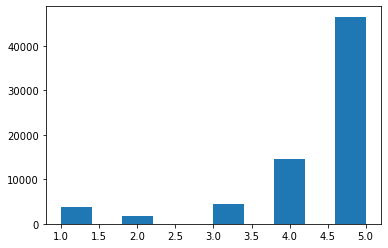

In [114]:
fig,ax = plt.subplots()
ax.hist(pandas_df['reviewsrating'])
plt.show()

In [ ]:
fig,ax = plt.subplots()
ax.hist(pandas_df[''])